In [1]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
tqdm.pandas()

scores_retrotesting.hd5 - Предсказанные скоры для новостей

In [3]:
scores = pd.read_hdf('scores_retrotesting.hd5', key='df')
scores.head()

,observation_id,news_id,10_True_0.05,ticker,final_score,final_probabilities,probability_of_conversion_calibrated_by_source.name,probability
0,3,000fb4a135119a9cf49fe51f91e37add,0.0,SALM,-1.322091,0.210471,0.052152,0.043633
1,4,000fda8be4442b6ffdcc247693075ffa,0.0,PCT,-1.206645,0.230295,0.000232,0.045608
2,13,00183e71753b66ed27eb5a59886eed7d,0.0,RXT,-4.440871,0.011648,0.000001,0.012884
3,83,008cc24b6c7b3411c1de52d6ab579c6c,0.0,ALYA,-1.930154,0.126734,0.052213,0.034512
4,190,01305f2972f162fa8e0a64d910b7a113,0.0,SELB,-1.934781,0.126222,0.000003,0.034450


In [4]:
scores.describe()

,observation_id,10_True_0.05,final_score,final_probabilities,probability_of_conversion_calibrated_by_source.name,probability
count,36398.000000,36398.000000,36398.000000,3.639800e+04,36398.000000,36398.000000
mean,18198.500000,0.014754,-2.883906,1.351183e-01,0.028384,0.031537
std,10507.341886,0.120567,1.977213,1.935038e-01,0.060199,0.027775
min,0.000000,0.000000,-14.254610,6.446165e-07,0.000001,0.000254
25%,9099.250000,0.000000,-4.125994,1.589084e-02,0.000051,0.014594
50%,18198.500000,0.000000,-2.923671,5.099573e-02,0.002064,0.023431
75%,27297.750000,0.000000,-1.633194,1.633933e-01,0.041623,0.038711
max,36397.000000,1.000000,5.159716,9.942895e-01,0.999966,0.380742


ticker_price_moment_exit.hd5 - Точные интрадей данные по определенному тикеру в момент выхода новости (в текущую секунду)

In [5]:
moment_price = pd.read_hdf('ticker_price_moment_exit.hd5', key='df')
moment_price.head()

,ticker,bidPrice,bidSize,askPrice,askSize,lastUpdated,lastSalePrice,lastSaleSize,lastSaleTime,volume,current_price,timestamp,news_id
0,VS,0.0,0.0,0.0,0.0,1629316800000.0,4.33,6.0,1629316790023,46.0,4.24,1629716406,0000d467d1a52a6a84fc8b30adbe8ec2
1,VSSYW,0.0,0.0,0.0,0.0,1628193600000.0,1.55,25.0,1628178157384,25.0,2.08,1629716406,0000d467d1a52a6a84fc8b30adbe8ec2
3,BTBT,0.0,0.0,0.0,0.0,1632513600000.0,9.44,1.0,1632513582057,38333.0,9.46,1632747622,0007ea6c22fc24e1f34021185ad07e4e
4,CAN,0.0,0.0,0.0,0.0,1632515322537,6.16,80.0,1632514484013,453506.0,6.11,1632747622,0007ea6c22fc24e1f34021185ad07e4e
5,HVBT,0.0,0.0,0.0,0.0,1631563200000.0,3.06,300.0,1631563186154,33347.0,3.06,1632747622,0007ea6c22fc24e1f34021185ad07e4e


intraday_data - данные по всем тикерам за дни тестирования (по-минутам)

In [4]:
files = [f for f in listdir('data/intraday_data') if isfile(join('data/intraday_data', f))]

In [5]:
df_list = []
for file in files:
    temp_df = pd.read_hdf('data/intraday_data/' + file, key='df')
    df_list.append(temp_df)
intraday = pd.concat(df_list)
intraday['date'] = pd.to_datetime(intraday['time'], unit='s')
intraday['date'] = intraday['date'].dt.date
#intraday = intraday[['open', 'close', 'time', 'ticker', 'date']]
intraday['time'] = pd.to_datetime(intraday['time'], unit='s')
intraday.head()

,open,high,close,low,volume,time,formated time,ticker,autofilled,date
0,35.2400,35.2400,35.24,35.24,4578.0,2021-08-12 13:30:00,2021-08-12 13:30:00+00:00,WMG,False,2021-08-12
1,35.2400,NaN,35.24,NaN,NaN,2021-08-12 13:31:00,2021-08-12 13:31:00+00:00,WMG,True,2021-08-12
2,35.3200,35.3200,35.32,35.32,150.0,2021-08-12 13:32:00,2021-08-12 13:32:00+00:00,WMG,False,2021-08-12
3,35.3200,NaN,35.32,NaN,NaN,2021-08-12 13:33:00,2021-08-12 13:33:00+00:00,WMG,True,2021-08-12
4,35.2639,35.2639,35.21,35.18,3029.0,2021-08-12 13:34:00,2021-08-12 13:34:00+00:00,WMG,False,2021-08-12


Допустим, мы хотим зайти в позицию по активу в момент выхода новости.
Рассмотрим сценарий, в котором мы заходим в позицию с новостями для которых модель предсказала высокий скор

In [8]:
high_score = 0.1
high_score_news = scores[scores['probability'] >= high_score]

Цена в момент публикации новости для новостей с высоким скором

In [9]:
moment_price = moment_price[moment_price['news_id'].isin(high_score_news['news_id'])]

In [10]:
moment_price = moment_price[['ticker', 'current_price', 'timestamp', 'news_id']]

In [11]:
moment_price['time'] = pd.to_datetime(moment_price['timestamp'], unit='s')
moment_price['date'] = moment_price['time'].dt.date
moment_price.head()

,ticker,current_price,timestamp,news_id,time,date
80,QD,1.57,1629795613,004d721f06bcc44ada6428bc4c82372c,2021-08-24 09:00:13,2021-08-24
188,PTON,114.09,1630008305,00c4fe497520e232e1e593160066c16b,2021-08-26 20:05:05,2021-08-26
193,VUZI,11.4,1631645489,00c9a60541dafc0ed0d8df0adc24c8e3,2021-09-14 18:51:29,2021-09-14
282,MLNK,28.46,1631045352,01275ce6fbd4fd3415805f1ee0e6afe3,2021-09-07 20:09:12,2021-09-07
286,ARCB,76.78,1632945914,012d84569d76c8c1894e20c0baecd195,2021-09-29 20:05:14,2021-09-29


Цена за следующие n минут

In [26]:
def get_next_price(row, duration=15):
    result = [row['current_price']]
    ticker_prices = intraday[(intraday['ticker'] == row['ticker']) & (intraday['date'] == row['date'])]
    for m in range(1, duration + 1):
        new_time = row['time'] + pd.Timedelta(minutes=m)
        new_time =  new_time - pd.to_timedelta(new_time.second, unit='s')
        price = ticker_prices[ticker_prices['time'] == new_time]['close']
        result.extend(price)
    return result

In [27]:
result_price = moment_price.progress_apply(lambda x: get_next_price(x), axis=1)

100%|██████████| 816/816 [26:50<00:00,  1.97s/it]


In [32]:
fifteen_m_data = pd.DataFrame.from_records(result_price.values)

Посмотрим, менялась ли цена во время 15 минут после выхода новости

In [68]:
def has_price_changing(row):
    return len(np.unique(row.values)) != 1

In [75]:
fifteen_m_data['has_price_changing'] = fifteen_m_data.iloc[:, 1:].apply(lambda x: has_price_changing(x), axis=1)
fifteen_m_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,has_price_changing
0,1.57,1.59,1.59,1.590,1.5900,1.590,1.590,1.59,1.5900,1.59,1.59,1.59,1.590,1.5900,1.59,1.5900,False
1,114.09,98.44,98.79,98.100,98.7299,99.410,98.690,99.80,99.4500,101.50,101.62,101.26,100.630,101.0000,101.00,100.7600,True
2,11.40,11.43,11.38,11.378,11.3900,11.335,11.365,11.38,11.3599,11.37,11.36,11.35,11.335,11.3345,11.32,11.3756,True
3,28.46,29.50,29.50,29.500,29.5000,29.500,29.260,29.00,29.0000,29.00,29.00,29.00,29.000,29.0000,29.00,29.0000,True
4,76.78,76.78,76.78,76.780,76.7800,76.780,76.780,76.78,76.7800,76.78,76.78,76.78,76.780,76.7800,76.78,76.7800,False


В 270 случаях цена оставалась прежней на протяжении 15 минут после изменения в первую минуту после выхода материала.
В 546 случаях цена менялась

In [76]:
fifteen_m_data[fifteen_m_data['has_price_changing'] == 0].shape

(270, 17)

In [77]:
fifteen_m_data[fifteen_m_data['has_price_changing'] == 1].shape

(546, 17)

Посмотрим, на какой минуте цена достигает своего максимума

In [78]:
def get_max_price_minute(row):
    return np.argmax(row.values, axis=0)

In [79]:
fifteen_m_data['max_minute'] = fifteen_m_data.apply(lambda x: get_max_price_minute(x), axis=1)
fifteen_m_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,has_price_changing,max_minute
0,1.57,1.59,1.59,1.590,1.5900,1.590,1.590,1.59,1.5900,1.59,1.59,1.59,1.590,1.5900,1.59,1.5900,False,1
1,114.09,98.44,98.79,98.100,98.7299,99.410,98.690,99.80,99.4500,101.50,101.62,101.26,100.630,101.0000,101.00,100.7600,True,0
2,11.40,11.43,11.38,11.378,11.3900,11.335,11.365,11.38,11.3599,11.37,11.36,11.35,11.335,11.3345,11.32,11.3756,True,1
3,28.46,29.50,29.50,29.500,29.5000,29.500,29.260,29.00,29.0000,29.00,29.00,29.00,29.000,29.0000,29.00,29.0000,True,1
4,76.78,76.78,76.78,76.780,76.7800,76.780,76.780,76.78,76.7800,76.78,76.78,76.78,76.780,76.7800,76.78,76.7800,False,0


В основном максимум цены достигается в момент выхода новости и в первую минуту после ее выхода

In [84]:
fifteen_m_data[fifteen_m_data['has_price_changing'] == 1]['max_minute'].value_counts()

0     130
1     121
15     34
2      31
3      28
16     28
4      22
14     21
8      19
11     17
13     16
5      16
10     14
6      13
7      12
9      12
12     12
Name: max_minute, dtype: int64

<AxesSubplot:>

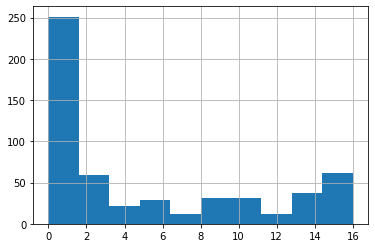

In [87]:
fifteen_m_data[fifteen_m_data['has_price_changing'] == 1]['max_minute'].hist()